In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from math import sqrt

In [2]:
dt=pd.read_csv(r"C:\Users\KIIT\OneDrive\Python Intro and Stats\Probability and Stats\diabetes.csv")
dt.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
dt.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [4]:
dt.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Maximum values of the columns
dt.max()


Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

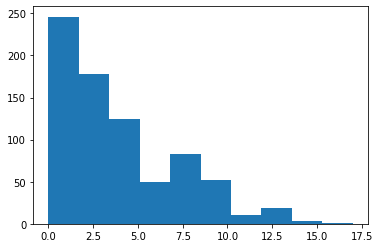

In [7]:
plt.hist(dt['Pregnancies'],bins=10)


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

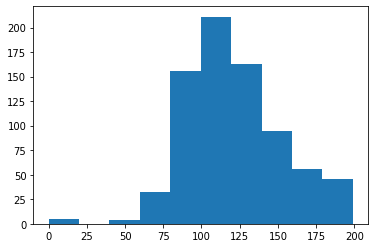

In [8]:

plt.hist(dt['Glucose'])

(array([ 35.,   0.,   3.,   2.,  24.,  94., 217., 228., 127.,  25.,  11.,
          2.]),
 array([  0.        ,  10.16666667,  20.33333333,  30.5       ,
         40.66666667,  50.83333333,  61.        ,  71.16666667,
         81.33333333,  91.5       , 101.66666667, 111.83333333,
        122.        ]),
 <a list of 12 Patch objects>)

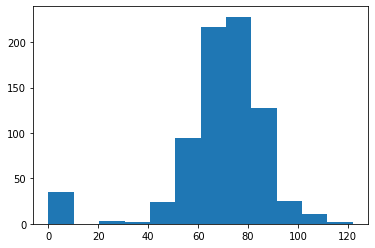

In [9]:
plt.hist(dt['BloodPressure'],bins=12)

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <a list of 10 Patch objects>)

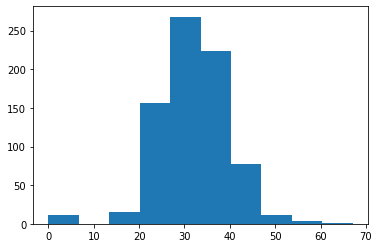

In [10]:
plt.hist(dt['BMI'],bins=10)

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <a list of 10 Patch objects>)

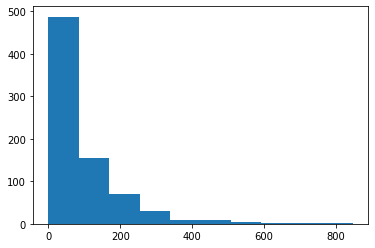

In [11]:
plt.hist(dt['Insulin'])

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

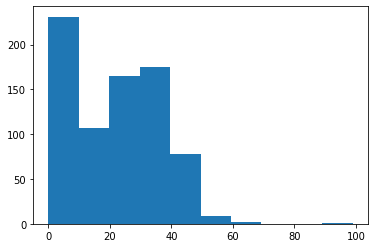

In [12]:
plt.hist(dt['SkinThickness'])

(array([318., 206., 136.,  58.,  25.,  15.,   3.,   3.,   1.,   3.]),
 array([0.078 , 0.3122, 0.5464, 0.7806, 1.0148, 1.249 , 1.4832, 1.7174,
        1.9516, 2.1858, 2.42  ]),
 <a list of 10 Patch objects>)

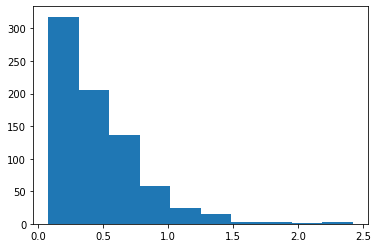

In [13]:
plt.hist(dt['DiabetesPedigreeFunction'])


(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <a list of 10 Patch objects>)

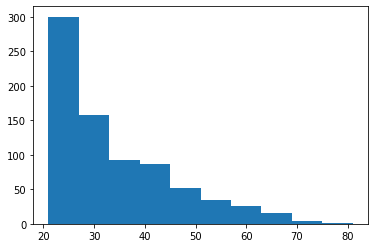

In [14]:
plt.hist(dt['Age'])

Text(0, 0.5, 'glucose')

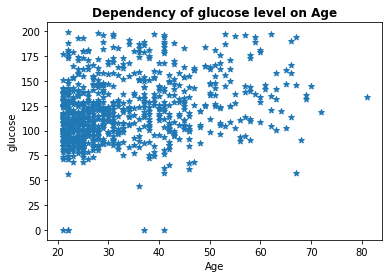

In [15]:
plt.scatter(dt['Age'],dt['Glucose'],marker='*')

plt.title("Dependency of glucose level on Age",fontweight="bold")
plt.xlabel("Age")
plt.ylabel("glucose")

Text(0, 0.5, 'DiabetesPedigreeFunction')

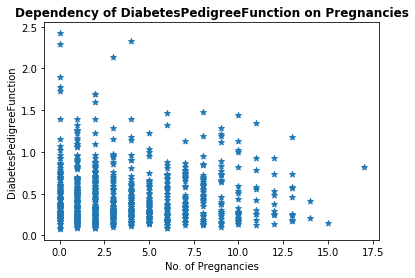

In [16]:
plt.scatter(dt['Pregnancies'],dt['DiabetesPedigreeFunction'],marker='*')
plt.title("Dependency of DiabetesPedigreeFunction on Pregnancies",fontweight="bold")
plt.xlabel("No. of Pregnancies")
plt.ylabel("DiabetesPedigreeFunction")

Text(0, 0.5, 'DiabetesPedigreeFunction')

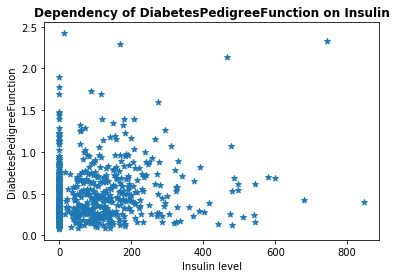

In [17]:
plt.scatter(dt['Insulin'],dt['DiabetesPedigreeFunction'],marker='*')
plt.title("Dependency of DiabetesPedigreeFunction on Insulin",fontweight="bold")
plt.xlabel("Insulin level")
plt.ylabel("DiabetesPedigreeFunction")

Text(0, 0.5, 'BloodPressure')

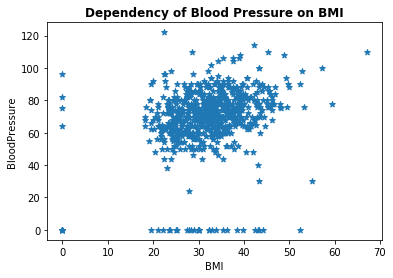

In [18]:
plt.scatter(dt['BMI'],dt['BloodPressure'],marker='*')
plt.title("Dependency of Blood Pressure on BMI",fontweight="bold")
plt.xlabel("BMI")
plt.ylabel("BloodPressure")

Text(0, 0.5, 'Skin Thickness')

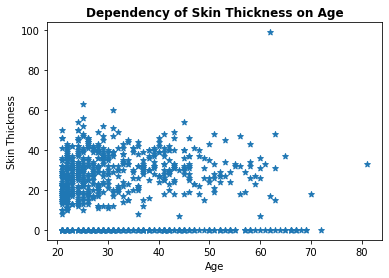

In [19]:
plt.scatter(dt['Age'],dt['SkinThickness'],marker='*')
plt.title("Dependency of Skin Thickness on Age",fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Skin Thickness")

Text(0, 0.5, 'Blood Pressure')

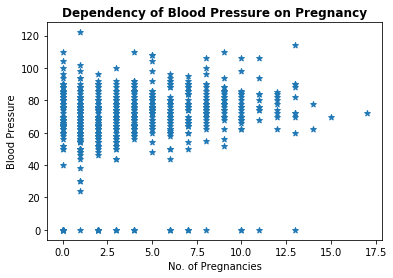

In [20]:
plt.scatter(dt['Pregnancies'],dt['BloodPressure'],marker='*')
plt.title("Dependency of Blood Pressure on Pregnancy",fontweight="bold")
plt.xlabel("No. of Pregnancies")
plt.ylabel("Blood Pressure")

In [21]:
X = dt.drop(['Outcome'], axis = 1)
y = dt['Outcome']
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))



In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 10
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=10 is",metrics.accuracy_score(y_test, Pred_y))


Accuracy of model at K=10 is 0.7597402597402597


To increase Model Accuracy

Maximum accuracy:- 0.7857142857142857 at K = 28


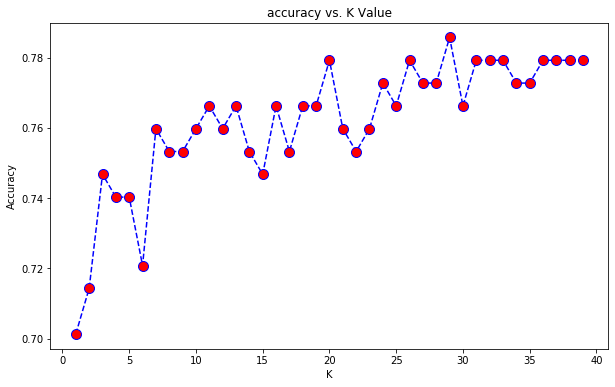

In [24]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_p = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_p))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Now taking k=28(for maximum accuracy).28 is nearly equal to square root of 768 which total no. of observations(or tuples).

In [25]:
#Train Model and Predict
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)




In [26]:
k = 28
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_p = neigh.predict(X_test)
print("Accuracy of model at K=28 is",metrics.accuracy_score(y_test,y_p))


Accuracy of model at K=28 is 0.7727272727272727


In [27]:
new_input = [[1,89,67,23,94,28.1,0.167,21]]

In [28]:
new_output = neigh.predict(new_input)
print(new_output)

[1]


In [29]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_p = clf.predict(X_test)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_p))

Accuracy: 0.6818181818181818


In [33]:
y_p

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

 Predicting on new data

In [34]:
new_input = [[1,89,67,23,94,28.1,0.167,21]]


In [35]:
new_output = clf.predict(new_input)

In [36]:
print(new_output)

[1]
